In [153]:
import pandas as pd
import numpy as np

import scipy.stats as stats

%matplotlib inline
pd.options.display.mpl_style = 'default'
np.set_printoptions(precision=4,suppress=True)
import seaborn as sns

# %pylab inline
# pd.options.display.mpl_style = 'default'

In [58]:
loandata_sf_final = pd.read_csv("..//data//lending_club//loandata_sf_final.csv")

In [59]:
loandata_sf_final.columns

Index([u'loan_amnt', u'installment', u'annual_inc', u'dti', u'tax_liens',
       u'bc_util', u'bc_open_to_buy', u'total_bal_ex_mort',
       u'acc_open_past_24mths', u'chargeoff_within_12_mths', u'delinq_2yrs',
       u'mths_since_last_delinq', u'pct_tl_nvr_dlq', u'num_sats',
       u'num_tl_120dpd_2m', u'num_tl_30dpd', u'num_tl_90g_dpd_24m',
       u'num_accts_ever_120_pd', u'mths_since_recent_revol_delinq', u'id',
       u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title',
       u'emp_length', u'home_ownership', u'verification_status', u'issue_d',
       u'loan_status', u'title', u'addr_state', u'credit_score', u'emp_yr',
       u'dlq_status', u'loan_issue_date'],
      dtype='object')

In [60]:
loandata_sf_final.head()

,loan_amnt,installment,annual_inc,dti,tax_liens,bc_util,bc_open_to_buy,total_bal_ex_mort,acc_open_past_24mths,chargeoff_within_12_mths,...,home_ownership,verification_status,issue_d,loan_status,title,addr_state,credit_score,emp_yr,dlq_status,loan_issue_date
0,10400,321.08,58000.0,14.92,0,41.5,7599.0,15030,7,0,...,MORTGAGE,Not Verified,14-Dec,Current,Credit card refinancing,CA,820,8,0,12/1/2014
1,15000,463.09,80000.0,14.39,0,79.2,2164.0,46949,4,0,...,MORTGAGE,Not Verified,14-Dec,Current,Debt consolidation,TX,820,8,0,12/1/2014
2,28000,864.44,130000.0,8.61,0,29.1,92775.0,119850,18,0,...,MORTGAGE,Verified,14-Dec,Fully Paid,Credit card refinancing,CA,820,8,0,12/1/2014
3,12000,370.48,70000.0,21.33,0,56.8,16285.0,39767,2,0,...,MORTGAGE,Not Verified,14-Dec,Current,Credit card refinancing,MA,820,8,0,12/1/2014
4,24000,740.95,120000.0,16.57,0,47.1,46575.0,70443,4,0,...,RENT,Source Verified,14-Dec,Current,Debt consolidation,OK,820,8,0,12/1/2014


In [113]:
loandata_sf_final.loan_issue_date.dtype

dtype('O')

In [115]:
loandata_sf_final['issue_d_formatted'] = pd.to_datetime(loandata_sf_final.loan_issue_date,  unit = 'D')

In [165]:
loandata_sf_final.shape
del loandata_sf_final["loan_issue_date"]
loandata_sf_final.shape

(235629, 36)

# Data Null Filling In

In [159]:
# check for number of missing values per column
loandata_sf_final.isnull().sum()

loan_amnt                              0
installment                            0
annual_inc                             0
dti                                    0
tax_liens                              0
bc_util                             2611
bc_open_to_buy                      2445
total_bal_ex_mort                      0
acc_open_past_24mths                   0
chargeoff_within_12_mths               0
delinq_2yrs                            0
mths_since_last_delinq            115881
pct_tl_nvr_dlq                         0
num_sats                               0
num_tl_120dpd_2m                    7860
num_tl_30dpd                           0
num_tl_90g_dpd_24m                     0
num_accts_ever_120_pd                  0
mths_since_recent_revol_delinq    150863
id                                     0
term                                   0
int_rate                               0
grade                                  0
sub_grade                              0
emp_title       

In [160]:
loandata_sf_final_nonnull = loandata_sf_final.dropna()
print "Fraction of data kept:\n",float(loandata_sf_final_nonnull.shape[0])/loandata_sf_final.shape[0]

Fraction of data kept:
0.323631641267


In [161]:
loandata_sf_final_nonnull.shape

(76257, 37)

In [180]:
cat_columns_null = ["emp_title"]
num_columns_null = ["bc_util", "bc_open_to_buy", "mths_since_last_delinq", "num_tl_120dpd_2m","mths_since_recent_revol_delinq"]

In [171]:
# Categoric values na filling with most frequent

#function to return the most frequent value in a pandas Series
def get_most_frequent_value(my_column):
    return my_column.value_counts().index[0]

In [175]:
most_frequent_values_per_column = loandata_sf_final[cat_columns_null].apply(get_most_frequent_value,axis=0)
print "Most frequent value in each column:\n",most_frequent_values_per_column

Most frequent value in each column:
emp_title    Teacher
dtype: object


In [178]:
categorical_most_frequent = loandata_sf_final[cat_columns_null].fillna(most_frequent_values_per_column,axis=0)
categorical_most_frequent.isnull().sum()
categorical_most_frequent

emp_title    0
dtype: int64

In [189]:
# Numeric Value na filling with zero
default_value_per_column = loandata_sf_final[num_columns_null].fillna(0.0)
default_value_per_column.head()
default_value_per_column.isnull().sum()
default_value_per_column.dtypes

bc_util                           float64
bc_open_to_buy                    float64
mths_since_last_delinq            float64
num_tl_120dpd_2m                  float64
mths_since_recent_revol_delinq    float64
dtype: object

In [190]:
loandata_sf_final_filled = loandata_sf_final.copy()
loandata_sf_final_filled[num_columns_null] = default_value_per_column
loandata_sf_final_filled[cat_columns_null] = categorical_most_frequent
loandata_sf_final_filled.isnull().sum()

loan_amnt                         0
installment                       0
annual_inc                        0
dti                               0
tax_liens                         0
bc_util                           0
bc_open_to_buy                    0
total_bal_ex_mort                 0
acc_open_past_24mths              0
chargeoff_within_12_mths          0
delinq_2yrs                       0
mths_since_last_delinq            0
pct_tl_nvr_dlq                    0
num_sats                          0
num_tl_120dpd_2m                  0
num_tl_30dpd                      0
num_tl_90g_dpd_24m                0
num_accts_ever_120_pd             0
mths_since_recent_revol_delinq    0
id                                0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
verification_status         

In [191]:
loandata_sf_final_filled.shape

(235629, 36)

In [202]:
loandata_sf_final_filled.head()

,loan_amnt,installment,annual_inc,dti,tax_liens,bc_util,bc_open_to_buy,total_bal_ex_mort,acc_open_past_24mths,chargeoff_within_12_mths,...,home_ownership,verification_status,issue_d,loan_status,title,addr_state,credit_score,emp_yr,dlq_status,issue_d_formatted
0,10400,321.08,58000.0,14.92,0,41.5,7599.0,15030,7,0,...,MORTGAGE,Not Verified,14-Dec,Current,Credit card refinancing,CA,820,8,0,2014-12-01
1,15000,463.09,80000.0,14.39,0,79.2,2164.0,46949,4,0,...,MORTGAGE,Not Verified,14-Dec,Current,Debt consolidation,TX,820,8,0,2014-12-01
2,28000,864.44,130000.0,8.61,0,29.1,92775.0,119850,18,0,...,MORTGAGE,Verified,14-Dec,Fully Paid,Credit card refinancing,CA,820,8,0,2014-12-01
3,12000,370.48,70000.0,21.33,0,56.8,16285.0,39767,2,0,...,MORTGAGE,Not Verified,14-Dec,Current,Credit card refinancing,MA,820,8,0,2014-12-01
4,24000,740.95,120000.0,16.57,0,47.1,46575.0,70443,4,0,...,RENT,Source Verified,14-Dec,Current,Debt consolidation,OK,820,8,0,2014-12-01


In [205]:
def yearmon(row):
    return row['issue_d_formatted'].year*100 + row['issue_d_formatted'].month

In [206]:
loandata_sf_final_filled['Issue_YearMon'] = loandata_sf_final_filled.apply(yearmon, axis=1)

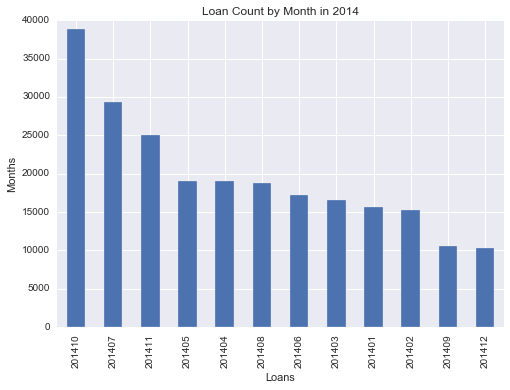

In [207]:
LoanCounts = loandata_sf_final_filled.Issue_YearMon.value_counts()
LoanCounts.plot(kind='bar', title="Loan Count by Month in 2014")
plt.ylabel("Months")
plt.xlabel("Loans")

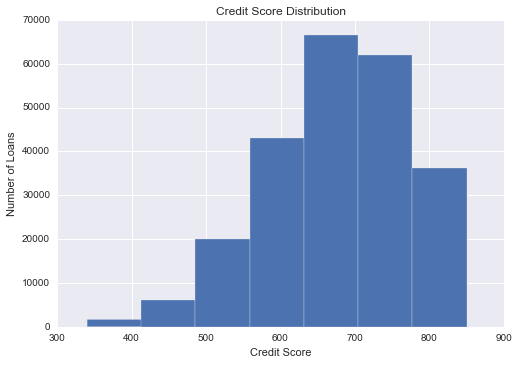

In [208]:
loandata_sf_final_filled.credit_score.hist(bins=7)
plt.title("Credit Score Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("Credit Score")

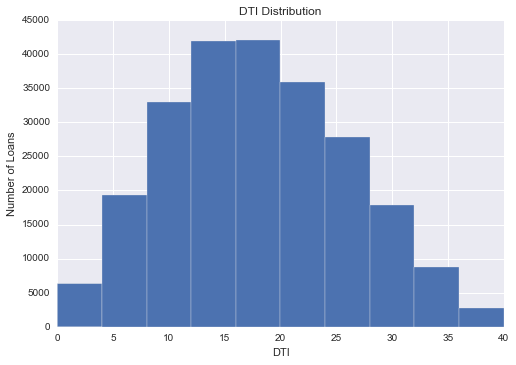

In [209]:
loandata_sf_final_filled.dti.hist(bins=10)
plt.title("DTI Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("DTI")

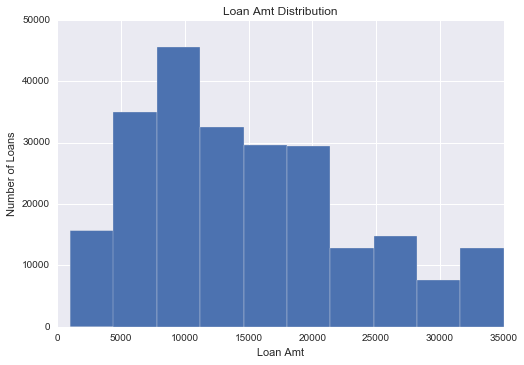

In [210]:
loandata_sf_final_filled.loan_amnt.hist(bins=10)
plt.title("Loan Amt Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("Loan Amt")

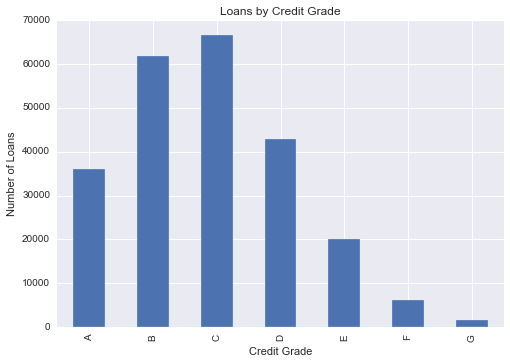

In [211]:
loandata_sf_final_filled.groupby("grade").size().plot(kind='bar', title = "Loans by Credit Grade")
plt.ylabel("Number of Loans")
plt.xlabel("Credit Grade")

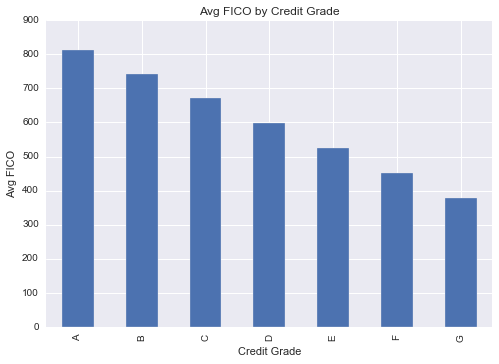

In [212]:
loandata_sf_final_filled.groupby("grade")["credit_score"].agg(np.mean).plot(kind='bar', title = "Avg FICO by Credit Grade")
plt.ylabel("Avg FICO")
plt.xlabel("Credit Grade")

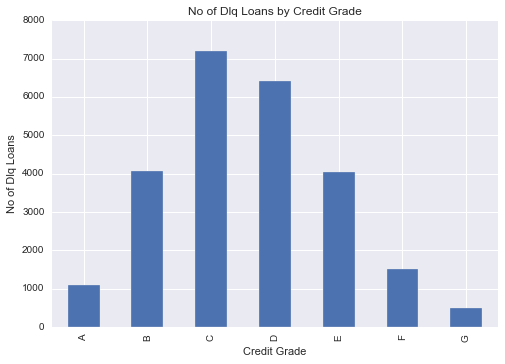

In [213]:
loandata_sf_final_filled.groupby("grade")["dlq_status"].agg(np.sum).plot(kind='bar', title = "No of Dlq Loans by Credit Grade")
plt.ylabel("No of Dlq Loans")
plt.xlabel("Credit Grade")

In [218]:
dlq_status_grp = loandata_sf_final_filled.groupby("dlq_status")["grade"]
print dlq_status_grp.size()

dlq_status
0    210790
1     24839
dtype: int64


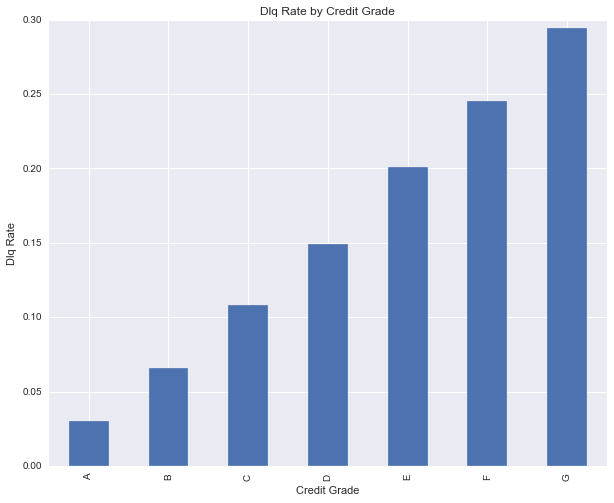

In [214]:
loandata_sf_final_filled.groupby("grade")["dlq_status"].agg(np.mean).plot(kind='bar', title = "Dlq Rate by Credit Grade", figsize=(10,8))
plt.ylabel("Dlq Rate")
plt.xlabel("Credit Grade")

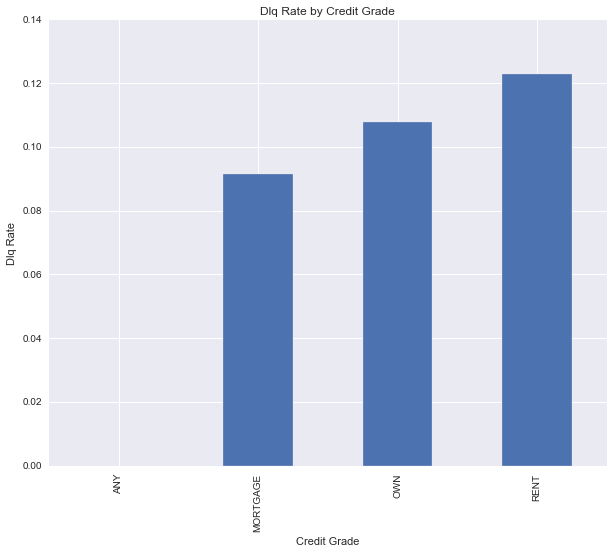

In [215]:
loandata_sf_final_filled.groupby("home_ownership")["dlq_status"].agg(np.mean).plot(kind='bar', title = "Dlq Rate by Credit Grade", figsize=(10,8))
plt.ylabel("Dlq Rate")
plt.xlabel("Credit Grade")

In [216]:
print loandata_sf_final_filled.home_ownership.unique()
home_grp = loandata_sf_final_filled.groupby('home_ownership')
print home_grp.size()

['MORTGAGE' 'RENT' 'OWN' 'ANY']
home_ownership
ANY              1
MORTGAGE    119937
OWN          23007
RENT         92684
dtype: int64


# Correlation and Heatmap

In [219]:
few_feature_selected = ['annual_inc', 'dti', 'bc_util','int_rate', 'credit_score', 'dlq_status']
loandata_few_features = loandata_sf_final_filled[few_feature_selected ]
loandata_few_features.head()


,annual_inc,dti,bc_util,int_rate,credit_score,dlq_status
0,58000.0,14.92,41.5,0.0699,820,0
1,80000.0,14.39,79.2,0.0699,820,0
2,130000.0,8.61,29.1,0.0699,820,0
3,70000.0,21.33,56.8,0.0699,820,0
4,120000.0,16.57,47.1,0.0699,820,0


In [220]:
loandata_few_features.dtypes

annual_inc      float64
dti             float64
bc_util         float64
int_rate        float64
credit_score      int64
dlq_status        int64
dtype: object

 Correlation: 
[[ 1.     -0.212  -0.001  -0.0839  0.0826 -0.0442]
 [-0.212   1.      0.1672  0.1512 -0.158   0.0647]
 [-0.001   0.1672  1.      0.2591 -0.2566  0.0432]
 [-0.0839  0.1512  0.2591  1.     -0.9909  0.1897]
 [ 0.0826 -0.158  -0.2566 -0.9909  1.     -0.1873]
 [-0.0442  0.0647  0.0432  0.1897 -0.1873  1.    ]]


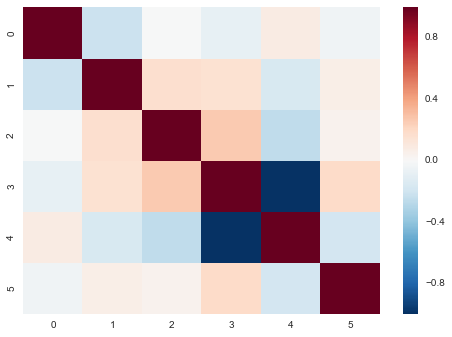

In [221]:
# loandata_few_features_cov = np.cov(loandata_few_features.T)
loandata_few_features_corr = np.corrcoef(loandata_few_features.T)

# print "Covariance: \n", loandata_few_features_cov
print " Correlation: \n", loandata_few_features_corr

sns.heatmap(loandata_few_features_corr)



In [222]:
loandata_few_features.credit_score.corr(loandata_few_features.int_rate, method="spearman")


-0.99250545617773756

In [224]:
loandata_few_features.credit_score.corr(loandata_few_features.dlq_status, method="spearman")

-0.18132396314637061

In [242]:
countby_states_data =  pd.DataFrame(loandata_sf_final_filled.groupby("addr_state").size().reset_index(name='loan_count'))

In [244]:
# Did not work
import folium
import pandas as pd

state_geo = r'data/us-states.json'

#Let Folium determine the scale
map = folium.Map(location=[48, -102], zoom_start=3)
map.geo_json(geo_path=state_geo, data=countby_states_data,
             columns=['addr_state', 'loan_count'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Loan Count')
map.create_map(path='us_states.html')


C:\Anaconda2\lib\site-packages\folium\folium.py:504: UserWarning: This method is deprecated. Please use Map.choropleth instead.
  warnings.warn('This method is deprecated. '


IOError: [Errno 2] No such file or directory: 'data/us-states.json'

In [226]:
loandata_sf_final_filled.columns

Index([u'loan_amnt', u'installment', u'annual_inc', u'dti', u'tax_liens',
       u'bc_util', u'bc_open_to_buy', u'total_bal_ex_mort',
       u'acc_open_past_24mths', u'chargeoff_within_12_mths', u'delinq_2yrs',
       u'mths_since_last_delinq', u'pct_tl_nvr_dlq', u'num_sats',
       u'num_tl_120dpd_2m', u'num_tl_30dpd', u'num_tl_90g_dpd_24m',
       u'num_accts_ever_120_pd', u'mths_since_recent_revol_delinq', u'id',
       u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title',
       u'emp_length', u'home_ownership', u'verification_status', u'issue_d',
       u'loan_status', u'title', u'addr_state', u'credit_score', u'emp_yr',
       u'dlq_status', u'issue_d_formatted', u'Issue_YearMon'],
      dtype='object')

In [227]:
loandata_sf_final_filled.head()

,loan_amnt,installment,annual_inc,dti,tax_liens,bc_util,bc_open_to_buy,total_bal_ex_mort,acc_open_past_24mths,chargeoff_within_12_mths,...,verification_status,issue_d,loan_status,title,addr_state,credit_score,emp_yr,dlq_status,issue_d_formatted,Issue_YearMon
0,10400,321.08,58000.0,14.92,0,41.5,7599.0,15030,7,0,...,Not Verified,14-Dec,Current,Credit card refinancing,CA,820,8,0,2014-12-01,201412
1,15000,463.09,80000.0,14.39,0,79.2,2164.0,46949,4,0,...,Not Verified,14-Dec,Current,Debt consolidation,TX,820,8,0,2014-12-01,201412
2,28000,864.44,130000.0,8.61,0,29.1,92775.0,119850,18,0,...,Verified,14-Dec,Fully Paid,Credit card refinancing,CA,820,8,0,2014-12-01,201412
3,12000,370.48,70000.0,21.33,0,56.8,16285.0,39767,2,0,...,Not Verified,14-Dec,Current,Credit card refinancing,MA,820,8,0,2014-12-01,201412
4,24000,740.95,120000.0,16.57,0,47.1,46575.0,70443,4,0,...,Source Verified,14-Dec,Current,Debt consolidation,OK,820,8,0,2014-12-01,201412


# Linear Regression to Predict Interest Rate

In [300]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

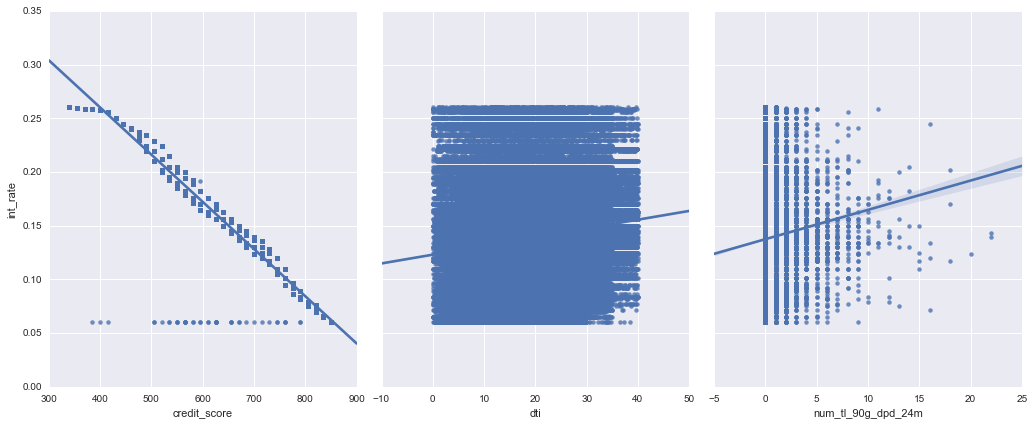

In [252]:
sns.pairplot(loandata_sf_final_filled, x_vars=['credit_score','dti','num_tl_90g_dpd_24m'], y_vars='int_rate', size=6, aspect=0.8, kind='reg')

In [297]:
# create X and y
feature_cols = ['credit_score']
X = loandata_sf_final_filled[feature_cols]
y = loandata_sf_final_filled.int_rate

# instantiate and fit
int_rate_linreg = LinearRegression()
int_rate_linreg.fit(X, y)

# print the coefficients
print "The y intercept:", int_rate_linreg.intercept_
print "The single coefficient:", int_rate_linreg.coef_

The y intercept: 0.43582954638
The single coefficient: [-0.0004]


In [283]:
loandata_sf_final_filled.dtypes

loan_amnt                                  int64
installment                              float64
annual_inc                               float64
dti                                      float64
tax_liens                                  int64
bc_util                                  float64
bc_open_to_buy                           float64
total_bal_ex_mort                          int64
acc_open_past_24mths                       int64
chargeoff_within_12_mths                   int64
delinq_2yrs                                int64
mths_since_last_delinq                   float64
pct_tl_nvr_dlq                           float64
num_sats                                   int64
num_tl_120dpd_2m                         float64
num_tl_30dpd                               int64
num_tl_90g_dpd_24m                         int64
num_accts_ever_120_pd                      int64
mths_since_recent_revol_delinq           float64
id                                         int64
term                

# Logistic Regression to Predict Deliquency Status

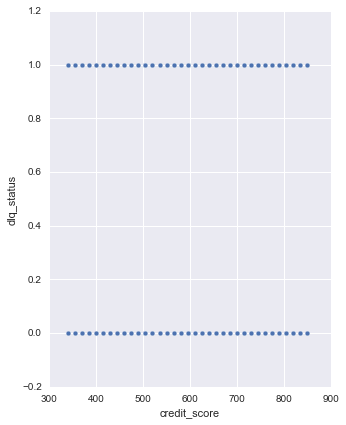

In [298]:
sns.pairplot(loandata_sf_final_filled, x_vars=['credit_score'],y_vars='dlq_status', size=6, aspect=0.8)

In [301]:

feature_cols = ['credit_score']
X = loandata_sf_final_filled[feature_cols]
y = loandata_sf_final_filled.dlq_status

# instantiate and fit
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)
outcome_pred_class_log = logreg.predict(X)


In [302]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

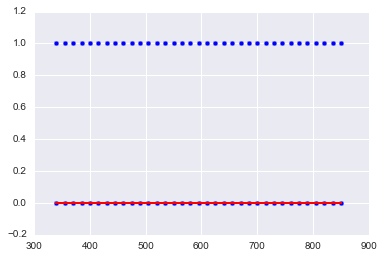

In [304]:
# plot the class predictions
plt.scatter(loandata_sf_final_filled.credit_score, loandata_sf_final_filled.dlq_status)
plt.plot(loandata_sf_final_filled.credit_score, outcome_pred_class_log, color='red')

In [308]:
loandata_sf_final_filled.dlq_status

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
235599    0
235600    0
235601    1
235602    0
235603    1
235604    0
235605    1
235606    0
235607    0
235608    0
235609    0
235610    1
235611    0
235612    0
235613    1
235614    0
235615    0
235616    1
235617    1
235618    1
235619    0
235620    1
235621    1
235622    1
235623    1
235624    0
235625    0
235626    0
235627    0
235628    0
Name: dlq_status, dtype: int64

In [309]:
print loandata_sf_final_filled.credit_score.corr(loandata_sf_final_filled.int_rate, method="spearman")

print loandata_sf_final_filled.credit_score.corr(loandata_sf_final_filled.dlq_status, method="spearman")

-0.992505456178
-0.181323963146
